In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

## Addition

In [3]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df.head()

,Power,Area,Energy,Delay,Design,Bits
0,1.1753,1084.036811,2.256576,1.92,PACoGen,8
1,2.4828,2231.577620,6.629076,2.67,PACoGen,16
2,5.6565,5144.764831,23.021955,4.07,PACoGen,32
3,0.6920,688.430403,1.349400,1.95,FloPosit,8
4,1.6927,1481.995205,4.942684,2.92,FloPosit,16


In [4]:
area_df = adder_df[["Area", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design      PACoGen     FloPosit        MARTo     Proposed
Bits                                                      
8       1084.036811   688.430403   556.718401   576.240003
16      2231.577620  1481.995205  1293.364804  1176.705608
32      5144.764831  3393.230403  2929.651213  2622.950420

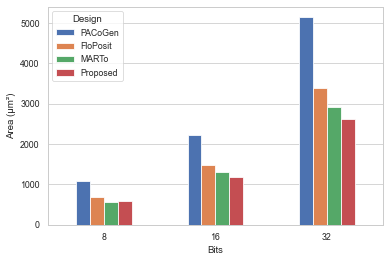

In [5]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

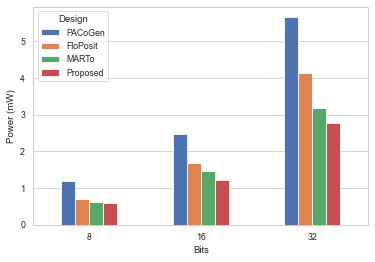

In [6]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

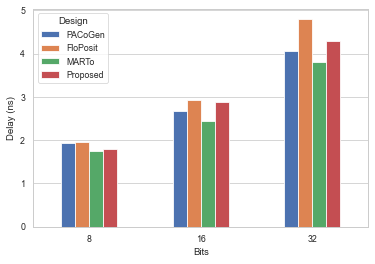

In [7]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

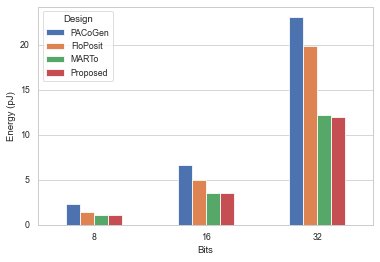

In [8]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

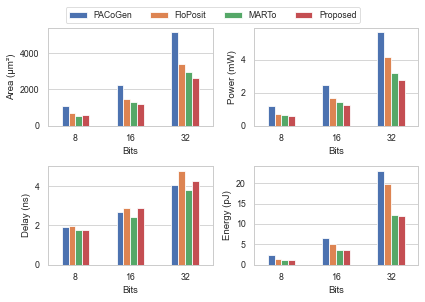

In [9]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)
axs[0,0].grid(False, axis="x")

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)
axs[0,1].grid(False, axis="x")

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)
axs[1,0].grid(False, axis="x")

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)"
)
axs[1,1].grid(False, axis="x")

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

plt.savefig("figs/adder.pdf", bbox_inches="tight")
plt.show()

## Multiplication

In [10]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Power,Area,Energy,Delay,Design,Bits
0,1.2546,1043.817606,1.881900,1.50,PACoGen,8
1,4.6095,3148.387216,11.754225,2.55,PACoGen,16
2,18.3376,10309.992072,81.969072,4.47,PACoGen,32
3,0.6346,557.188803,0.894786,1.41,FloPosit,8
4,3.1695,2060.116811,8.177310,2.58,FloPosit,16


In [11]:
area_df = mult_df[["Area", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design       PACoGen     FloPosit        MARTo     Proposed
Bits                                                       
8        1043.817606   557.188803   545.664000   516.499201
16       3148.387216  2060.116811  1962.273608  1883.952011
32      10309.992072  8132.980841  7690.334447  7468.305652

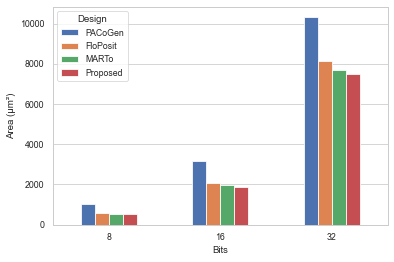

In [12]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

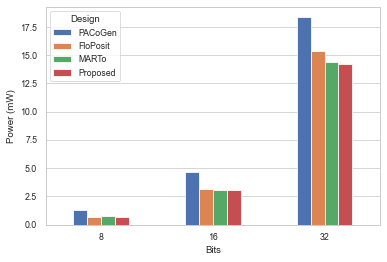

In [13]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

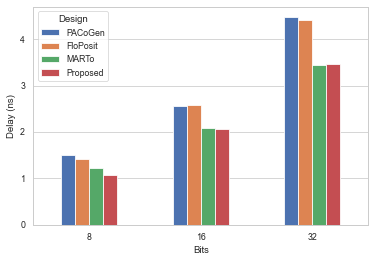

In [14]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

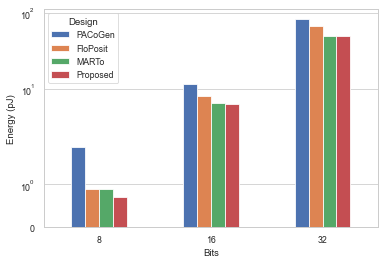

In [15]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

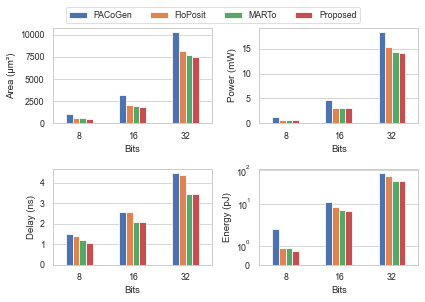

In [16]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)
axs[0,0].grid(False, axis="x")

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)
axs[0,1].grid(False, axis="x")

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)
axs[1,0].grid(False, axis="x")

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)
axs[1,1].grid(False, axis="x")

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.pdf", bbox_inches="tight")
plt.show()

## Single component comparison

In [17]:
components_df = pd.read_json("Misc/synopsys_results.json")
components_df.head()

,Component,Design,Area,Power,Delay,Energy
0,Decoder,Old,591.057600,0.5896,1.47,0.866712
1,Decoder,New,392.078402,0.2687,0.88,0.236456
2,Encoder,Old,843.662399,0.8172,1.14,0.931608
3,Encoder,New,564.244803,0.5120,0.93,0.476160
4,Adder,Old,1387.915205,1.4425,2.95,4.255375


In [18]:
decoder_df = components_df[components_df["Component"]=="Decoder"].groupby(["Design"], sort=False).sum().T
encoder_df = components_df[components_df["Component"]=="Encoder"].groupby(["Design"], sort=False).sum().T
adder_df = components_df[components_df["Component"]=="Adder"].groupby(["Design"], sort=False).sum().T
multiplier_df = components_df[components_df["Component"]=="Multiplier"].groupby(["Design"], sort=False).sum().T

In [19]:
# Normalize results with respect Old decoding format
designs = ["New", "Old"]
for d in designs:
    decoder_df[d] /= decoder_df["Old"]
    encoder_df[d] /= encoder_df["Old"]
    adder_df[d] /= adder_df["Old"]
    multiplier_df[d] /= multiplier_df["Old"]

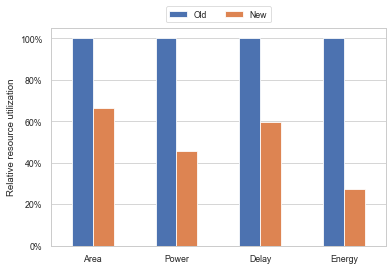

In [25]:
ax = decoder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                #  title="Decoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/decoder_cmp.pdf", bbox_inches="tight")
plt.show()

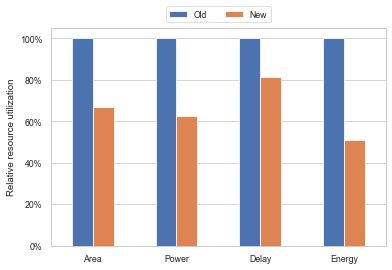

In [24]:
ax = encoder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                #  title="Encoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/encoder_cmp.pdf", bbox_inches="tight")
plt.grid(False, axis="x")
plt.show()

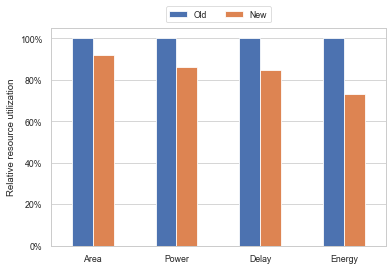

In [26]:
ax = adder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                #  title="Adder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/adder_cmp.pdf", bbox_inches="tight")
plt.show()

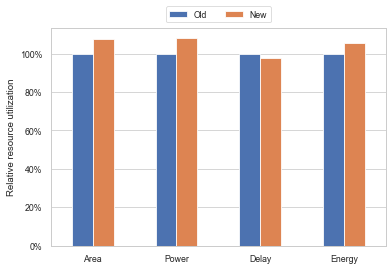

In [27]:
ax = multiplier_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                #  title="Multiplier component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/mutiplier_cmp.pdf", bbox_inches="tight")
plt.show()